In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




#Download iris dataset from any source  such as https://gist.github.com/netj/8836201

In [2]:
#Loading iris dataset into pandas dataFrame
iris = pd.read_csv('iris.csv')

In [3]:
#Number of data points and features , It provide a tuple with (number of rows, number of columns)
print (iris.shape)

(150, 5)


In [4]:
# Column names
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
# number of data points for each class
# Such type of dataset is known as balanced dataset where no. of data points for each class are almost similar
iris['species'].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: species, dtype: int64

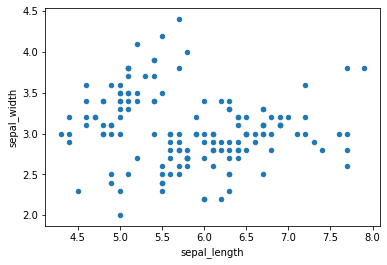

In [6]:
# 2-Dimesional Scatter plot
iris.plot(kind ='scatter', x ='sepal_length', y ='sepal_width');
plt.show()

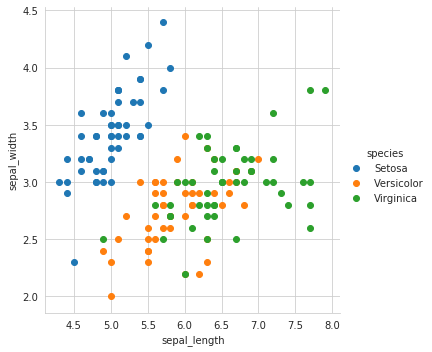

In [7]:
# Scatter plot with different color coding for different classes
sns.set_style('whitegrid');
sns.FacetGrid(iris, height = 5 , hue ='species') \
    .map(plt.scatter, 'sepal_length', 'sepal_width').add_legend();
plt.show()

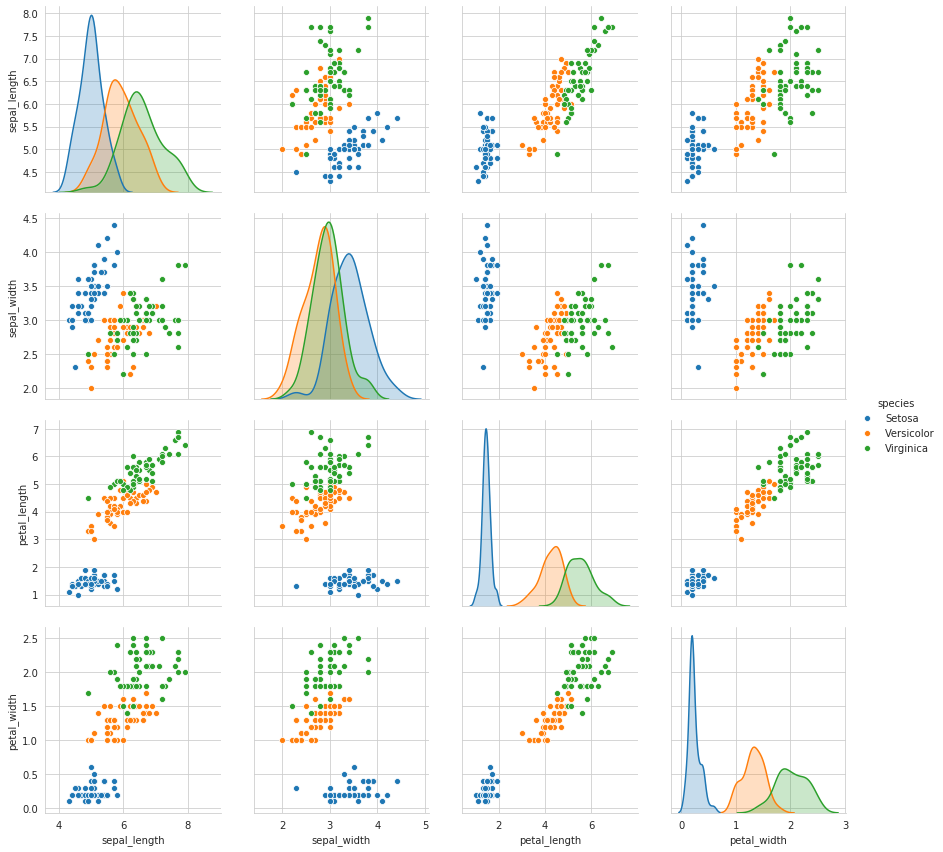

In [8]:
#Pairwise scatter plot, pair plot, More effective when number of features are high
#Doesn't able to work with 3d or higher patterns
#pair plots are good when the dimensionality of data is small
sns.pairplot(iris, hue ='species', height = 3)
plt.show()

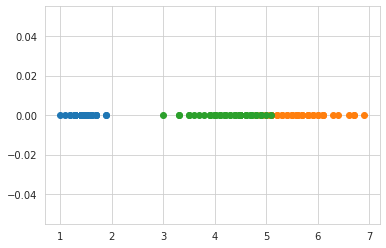

In [9]:
#Simple 1D scatter plot for petal_length
iris_set = iris.loc[iris['species']=='Setosa'];
iris_virg = iris.loc[iris['species']=='Virginica'];
iris_vers = iris.loc[iris['species'] == 'Versicolor'];
plt.plot(iris_set['petal_length'], np.zeros_like(iris_set['petal_length']), 'o')
plt.plot(iris_virg['petal_length'], np.zeros_like(iris_virg['petal_length']), 'o')
plt.plot(iris_vers['petal_length'], np.zeros_like(iris_vers['petal_length']), 'o')

plt.show()




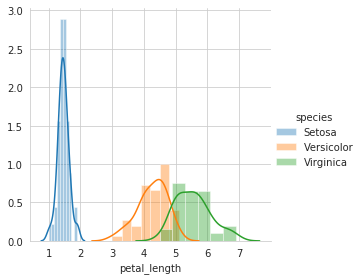

In [10]:
#Histogram for petal_length
#The blue, orange and green lines are known as Probability Density Function
sns.FacetGrid(iris, hue='species', height = 4).map(sns.distplot, 'petal_length').add_legend();
plt.show()

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


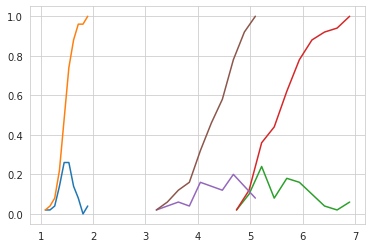

In [11]:
#Construction of PDF and CDF of petal_length
counts, bin_edges = np.histogram(iris_set['petal_length'], bins = 10, density = True)

PDF = counts/(sum(counts))
print (PDF);
print (bin_edges)

CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:], PDF)
plt.plot(bin_edges[1:], CDF)


counts, bin_edges = np.histogram(iris_virg['petal_length'], bins = 10, density = True)

PDF = counts/(sum(counts))
print (PDF);
print (bin_edges)

CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:], PDF)
plt.plot(bin_edges[1:], CDF)


counts, bin_edges = np.histogram(iris_vers['petal_length'], bins = 10, density = True)

PDF = counts/(sum(counts))
print (PDF);
print (bin_edges)

CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:], PDF)
plt.plot(bin_edges[1:], CDF)

In [12]:
# Mean standard deviation and variance

print ('----- Mean-------------' + '\n')
print (np.mean(iris_set['petal_length']));

# How an outlier can affect the mean
print (np.mean(np.append(iris_set['petal_length'], 50)));
print (np.mean(iris_virg['petal_length']));
print (np.mean(iris_vers['petal_length']));

print ( '\n'+'----- Standard Deviation-------------' + '\n')

print (np.std(iris_set['petal_length']));
print (np.std(iris_virg['petal_length']));
print (np.std(iris_vers['petal_length']));

print ( '\n'+'----- Variance-------------' + '\n')

print (np.var(iris_set['petal_length']));
print (np.var(iris_virg['petal_length']));
print (np.var(iris_vers['petal_length']));


----- Mean-------------

1.4620000000000002
2.4137254901960787
5.5520000000000005
4.26

----- Standard Deviation-------------

0.17191858538273283
0.546347874526844
0.4651881339845203

----- Variance-------------

0.029555999999999995
0.29849600000000004
0.21640000000000004


In [20]:
# Mean standard deviation and variance

print ('----- Median-------------' + '\n')
print (np.mean(iris_set['petal_length']));

# How an outlier can affect the mean
print (np.median(np.append(iris_set['petal_length'], 50)));
print (np.median(iris_virg['petal_length']));
print (np.median(iris_vers['petal_length']));

print ( '\n'+'----- Quartiles-------------' + '\n')

print (np.percentile(iris_set['petal_length'], np.arange(0,100,25)));
print (np.percentile(iris_virg['petal_length'], np.arange(0,100,25)));
print (np.percentile(iris_vers['petal_length'], np.arange(0,100,25)));

print ( '\n'+'----- 80th percentile-------------' + '\n')

print (np.percentile(iris_set['petal_length'], 95));
print (np.percentile(iris_virg['petal_length'], 95));
print (np.percentile(iris_vers['petal_length'], 95));



----- Median-------------

1.4620000000000002
1.5
5.55
4.35

----- Quantiles-------------

[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

----- 80th percentile-------------

1.7
6.654999999999999
4.9


In [21]:
from scipy import stats

In [25]:

print ( '\n'+'----- Median Absolute Deviation-------------' + '\n')
print (stats.median_absolute_deviation(iris_set['petal_length']));
print (stats.median_absolute_deviation(iris_virg['petal_length']));
print (stats.median_absolute_deviation(iris_vers['petal_length']));


print ( '\n'+'----- IQR-------------' + '\n')
print (stats.iqr(iris_set['petal_length']));
print (stats.iqr(iris_virg['petal_length']));
print (stats.iqr(iris_vers['petal_length']));


----- Median Absolute Deviation-------------

0.14826000000000011
0.6671700000000003
0.5189099999999994

----- IQR-------------

0.17500000000000027
0.7750000000000012
0.5999999999999996


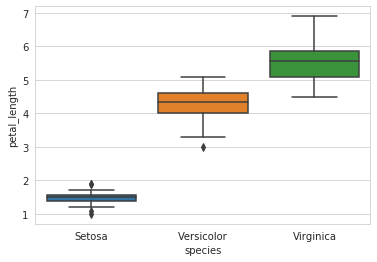

In [26]:
#box plot and whiskers to visualize 1d data, can see median, percentile and quantile
sns.boxplot(x ='species', y ='petal_length', data = iris)
plt.show()

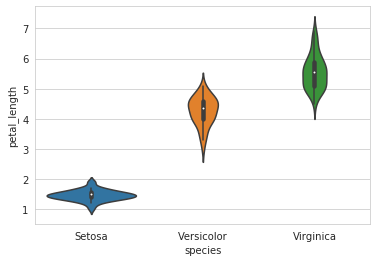

In [28]:
# violin plots
sns.violinplot(x='species', y ='petal_length', data = iris, size = 6)
plt.show()

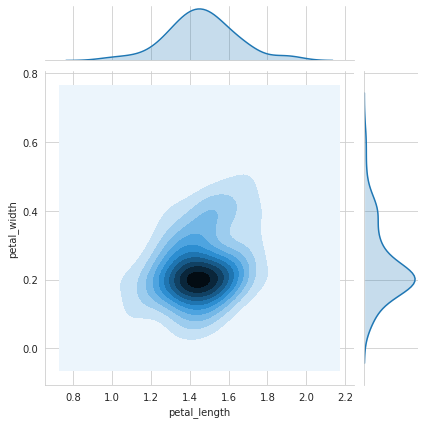

In [31]:
#2d density plot or contour probabilty density plots
sns.jointplot(x ='petal_length', y ='petal_width', data = iris_set, kind ='kde')
plt.show()